In [17]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import sys
sys.path.append('..')

import tidy3d as td
import tidy3d.web as web

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set up parameters of simulation
dl = 0.01
pml = td.PMLLayer(profile='standard', num_layers=10)
sim_size = [4, 4, 4]
freq0 = 3e14
fwidth = 1e13
run_time = 10/fwidth

# create structure
dielectric = td.nk_to_medium(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Jx')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Hy'],
    center=(0, 0, 0),
    size=(4, 4, 0),
    freqs=[freq0])

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources={'source': source},
                    monitors={'monitor': monitor},
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

task_id = web.upload(sim, task_name='quickstart')
web.start(task_id)
web.monitor(task_id)

[15:18:33] INFO     Creating task.                                              ]8;id=903459;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:323

[15:18:34] INFO     Uploading the json file                                     ]8;id=604453;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:332

Output()

[15:18:36] status = queued                                                      ]8;id=452840;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:156

[15:20:32] status = preprocess                                                  ]8;id=131573;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:156

[15:20:53] status = running                                                     ]8;id=621174;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:156

[15:22:41] status = postprocess                                                 ]8;id=624154;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:156

[15:22:44] status = visualize                                                   ]8;id=315940;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:156

In [18]:
web.download(task_id, simulation=sim, path='data/sim_data.hdf5')

[15:31:56] INFO     clearing existing files before downloading                  ]8;id=698487;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:219

           INFO     removing file data/sim_data.hdf5                            ]8;id=734506;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:394

           INFO     downloading file "simulation.json" to                       ]8;id=359660;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:363
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=209592;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:363
                    "data/monitor_data.hdf5"

Output()

[15:32:03] INFO     getting log string                                          ]8;id=348679;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:228

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=134696;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:363

Output()

[15:32:04] INFO     loading old monitor data to data dict                       ]8;id=352017;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:233

           INFO     creating SimulationData from monitor data dict              ]8;id=394575;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:238

           INFO     exporting SimulationData to data/sim_data.hdf5              ]8;id=113631;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:245

           INFO     clearing extraneous files                                   ]8;id=730717;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:248

           INFO     removing file data/simulation.json                          ]8;id=176609;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:394

           INFO     removing file data/monitor_data.hdf5                        ]8;id=216078;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:394

           INFO     removing file data/tidy3d.log                               ]8;id=72447;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:394

           INFO     loading SimulationData from data/sim_data.hdf5              ]8;id=501751;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:274

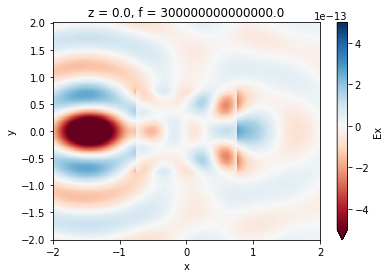

In [19]:
sim_data = web.load_data(task_id, simulation=sim, path='data/sim_data.hdf5')
ax = sim_data['monitor'].Ex.isel(f=0, z=0).imag.plot.pcolormesh(x='x', y='y', vmin=-5e-13, vmax=5e-13, cmap='RdBu')

plt.show()

In [20]:
sim_data.log

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 57696
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Get source modes time (s):    0.0525
Get monitor modes time (s):   0.0543
Rest of setup time (s):       0.0557

Starting solver...
- Time step   2307 / time 4.00e-14s (  4 % done), field decay: 1.00e+00
- Time step   4591 / time 7.96e-14s (  7 % done), field decay: 1.00e+00
- Time step   4615 / time 8.00e-14s (  8 % done), field decay: 1.00e+00
- Time step   6923 / time 1.20e-13s ( 12 % done), field decay: 7.96e-03
- Time step   9231 / time 1.60e-13s ( 16 % done), field decay: 2.82e-03
- Time step  11539 / time 2.00e-13s ( 20 % done), field decay: 1.29e-03
- Time step  13847 / time 2.40e-13s ( 24 % done), field decay: 3.11e-04
- Time step  16154 / time 2.80e-13s ( 28 % done), field decay: 1.84e-04
- Time step  18462 / time 3.20e-13s ( 32 % done